In [1]:
# import preprocess as prep
import model
import numpy as np
from datetime import datetime
import os
import importlib
from matplotlib import pyplot as plt

# preprocess / load preprocessed data (preprocess.py)
# mini batching

# load model(can quickly change model by changing imported model)
# train / log
# generate checkpoints

# this will output 15 results/sec, how are we gonna handle it?

In [2]:
# reload model file
importlib.reload(model)

<module 'model' from 'd:\\Users\\jerry.DESKTOP-KQESKMB\\Desktop\\pyt\\sign\\git_folder\\BomNae-SLR\\model.py'>

In [2]:
# utility functions

def bin2num(bin_arr):
    # big endian
    # lower index > higher exponent
    num = 0
    for val in bin_arr:
        num = (num << 1) | val
    return num

# def num2bin(num, arr_len = -1):
#     # big endian
#     # lower index > higher exponent
#     bin_arr = [int(x) for x in bin(num)[2:]]
#     diff = arr_len - len(bin_arr)
#     if diff < 1:
#         return bin_arr
#     else:
#         pad = [0] * diff
#         return pad+bin_arr
    
def num_arr2bin(num_arr, out_len = -1):
    # big endian
    # lower index > higher exponent
    res = []
    for num in num_arr:
        str_list = list(np.binary_repr(num).zfill(out_len))
        bin_arr = np.array(str_list, dtype=np.float32)
        res.append(bin_arr)
    return np.array(res)

def serialize(vids, stride = 1):
    """input shape: (load_size, frames)\n
    ouput shape: (load_size, input_seq_size, 63 or 32, frames)"""
    each_size = []
    x_res = []
    for vid in vids:
        window_len = 0
        start = 0
        while (start + 63) < len(vid):
            x_res.append(vid[start: start+63: stride])
            window_len += 1
            start += 6
        each_size.append(window_len)
    return np.array(x_res), each_size

In [3]:
# Configurations
load_size = 256 # number of data to be loaded at once
epochs = 8
batch_size = 16
save_dir = "C:/Users/jerry/Desktop/hly/2024-2/cap/BN_SLR/BomNae-SLR/checkpoints"
load_dir = "C:/Users/jerry/Desktop/hly/2024-2/cap/BN_SLR/BomNae-SLR/checkpoints"


In [6]:
# l_raw, r_raw, p_raw, y_raw, filePos = perp.load_data(something)

array([[1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]], dtype=float32)

In [37]:
# dummy x_raw data
l_raw = []
for i in range(load_size):
    h_elem = np.zeros(shape=(4,5,3))
    # p_elem = np.zeros(shape=(3,10))
    # comb_elem = [h_elem, h_elem, p_elem]
    x_elem = []
    for j in range(np.random.randint(70,71)): # frame size
        x_elem.append(h_elem)
        # x_elem.append(comb_elem)
    l_raw.append(x_elem)
r_raw = []
for i in range(load_size):
    h_elem = np.zeros(shape=(4,5,3))
    # p_elem = np.zeros(shape=(3,10))
    # comb_elem = [h_elem, h_elem, p_elem]
    x_elem = []
    for j in range(np.random.randint(70,71)): # frame size
        x_elem.append(h_elem)
        # x_elem.append(comb_elem)
    r_raw.append(x_elem)
p_raw = []
for i in range(load_size):
    # h_elem = np.zeros(shape=(4,5,3))
    p_elem = np.zeros(shape=(3,10))
    # comb_elem = [h_elem, h_elem, p_elem]
    x_elem = []
    for j in range(np.random.randint(70,71)): # frame size
        # x_elem.append(h_elem)
        x_elem.append(p_elem)
        # x_elem.append(comb_elem)
    p_raw.append(x_elem)

# dummy y_raw data
y_raw = np.random.randint(0,1024,load_size)

In [39]:
l_train, each = serialize(l_raw)
r_train, each = serialize(r_raw)
p_train, each = serialize(p_raw, stride=2)
y_train = np.repeat(y_raw, each)
y_train = num_arr2bin(y_train, 12)

In [62]:
# dummy data for model testing
# hand input shape: (batch, time, h, w, channels)
# pose input shape: (batch, time, channel, features)
# hand_l_dummy = np.zeros(shape=(load_size, 63, 4, 5, 3))
# hand_r_dummy = np.zeros(shape=(load_size, 63, 4, 5, 3))
# pose_dummy = np.zeros(shape=(load_size, 32, 3, 10))
# x_dummy = (hand_l_dummy, hand_r_dummy, pose_dummy)
# y_dummy1 = np.ones(shape=(load_size, 12))
# y_dummy0 = np.zeros(shape=(load_size, 12))

In [81]:
# model.reinit_model()

In [42]:
x_train = (l_train, r_train, p_train)


In [ ]:
x_train[0].shape

In [ ]:
y_train.shape

In [99]:
hist = model.train(x_train, y_train, epochs=8, batch_size= batch_size)

Epoch 1/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6946 
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6923 
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6889 
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6830  
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6753 
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6645 
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6544 
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6423 


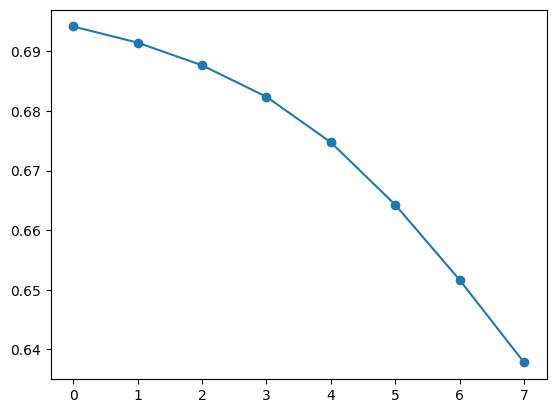

In [117]:
plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.scatter(range(len(hist.history['loss'])), hist.history['loss'])

In [93]:
importlib.reload(model)

<module 'model' from 'd:\\Users\\jerry.DESKTOP-KQESKMB\\Desktop\\pyt\\sign\\git_folder\\BomNae-SLR\\model.py'>

In [94]:
# pred = model.predict(x_dummy, batch_size=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [48]:
pred[0]

array([0.99877626, 0.9979128 , 0.9985296 , 0.9986358 , 0.9960804 ,
       0.995518  , 0.9969029 , 0.9925207 , 0.99776715, 0.9995015 ,
       0.996898  , 0.9965179 ], dtype=float32)

In [13]:
save_name = "asdf_test.keras"
save_path = os.path.join(save_dir, save_name)

In [35]:
model.save_model(save_path)

In [46]:
model.load_model(save_path)

Restored from C:/Users/jerry/Desktop/hly/2024-2/cap/BN_SLR/BomNae-SLR/checkpoints\asdf_test.keras\ckpt-1
